# 条件：此处针对多分类问题，即分类包括normal, U2R, R2L, Dos, PROBING
    如果是二分类问题，分类应该包括正常、异常
    或者另一种多分类问题就是，23种分类(完整数据集也是有23种分类)
    
    问题1：现在不明确分类中1，2，3，4对应哪一个入侵类型？
    问题2：训练集中的23个类别标签已分类，那么测试集中38个分类标签该如何分类?

## 加载数据和特征

In [4]:
import pandas as pd
import os
# os.listdir("datafile")

##相关特征##
Features=['duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent',
         'hot','num_failed_logins','logged_in','num_compromised','root_shell','su_attempted','num_root',
          'num_file_creations','num_shells','num_access_files','num_outbound_cmds','is_hot_login','is_guest_login',
         'count','srv_count','serror_rate','srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate',
          'diff_srv_rate','srv_diff_host_rate',
         'dst_hosts_count','dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate',
          'dst_host_same_src_port_rate','dst_host_srv_diff_host_rate','dst_host_serror_rate',
          'dst_host_srv_serror_rate','dst_host_rerror_rate','st_host_srv_rerror_rate', 
         'label']

Features_continue = ['duration','src_bytes','dst_bytes','wrong_fragment','urgent',
                    'hot','num_failed_logins','num_compromised','num_root','num_file_creations','num_shells',
                     'num_access_files','num_outbound_cmds',
                    'count','srv_count','serror_rate','srv_serror_rate','rerror_rate','srv_rerror_rate',
                     'same_srv_rate','diff_srv_rate','srv_diff_host_rate',
                    'dst_hosts_count','dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate',
                     'dst_host_same_src_port_rate','dst_host_srv_diff_host_rate','dst_host_serror_rate',
                     'dst_host_srv_serror_rate','dst_host_rerror_rate','st_host_srv_rerror_rate']

Features_discrete = ['protocol_type', 'service', 'flag', 'land', 'logged_in', 'root_shell', 'su_attempted', 
                     'is_hot_login', 'is_guest_login', 'label']

Features_num = ['duration', 'src_bytes','dst_bytes','land','wrong_fragment','urgent',
                 'hot','num_failed_logins','logged_in','num_compromised','root_shell','su_attempted','num_root',
                  'num_file_creations','num_shells','num_access_files','num_outbound_cmds','is_hot_login','is_guest_login',
                 'count','srv_count','serror_rate','srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate',
                  'diff_srv_rate','srv_diff_host_rate',
                 'dst_hosts_count','dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate',
                  'dst_host_same_src_port_rate','dst_host_srv_diff_host_rate','dst_host_serror_rate',
                  'dst_host_srv_serror_rate','dst_host_rerror_rate','st_host_srv_rerror_rate' ] 

Features_NonNumerical = ['protocol_type', 'service', 'flag', 'label']

Features_important = ['duration', 'protocol_type', 'service', 'src_bytes', 'dst_bytes','urgent', 'count',
                      'srv_count', 'same_srv_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 
                      'dst_host_same_src_port_rate']

##相关类别标签##
labels=['normal.', 'buffer_overflow.', 'loadmodule.', 'perl.', 'neptune.', 'smurf.', 'guess_passwd.', 'pod.', 
        'teardrop.', 'portsweep.', 'ipsweep.', 'land.', 'ftp_write.', 'back.', 'imap.', 'satan.', 'phf.',
        'nmap.', 'multihop.', 'warezmaster.', 'warezclient.', 'spy.', 'rootkit.'] + ['snmpgetattack.', 
        'named.', 'xlock.', 'xsnoop.', 'sendmail.', 'saint.', 'apache2.', 'udpstorm.', 
         'xterm.', 'mscan.', 'processtable.', 'ps.', 'httptunnel.', 'worm.', 'mailbomb.', 'sqlattack.', 'snmpguess.']
labels_Normal = ['normal.']
labels_Dos = ['back.', 'land.', 'neptune.', 'pod.', 'smurf.', 'teardrop.'] + ['apache2.', 'mailbomb.', 'processtable.', 'udpstorm.']
labels_Probing = ['ipsweep.', 'nmap.', 'portsweep.', 'satan.'] + ['mscan.', 'saint.']
labels_R2L = ['ftp_write.', 'guess_passwd.', 'imap.', 'multihop.', 'phf.', 'spy.', 'warezclient.', 'warezmaster.'] + ['snmpgetattack.',
                'named.', 'sendmail.', 'snmpgeattack.', 'snmpguess.', 'worm.', 'xlock.', 'xsnoop.']
labels_U2R = ['buffer_overflow.', 'loadmodule.', 'perl.', 'rootkit.'] + ['httptunnel.', 'ps.', 'sqlattack.', 'xterm.']

kdd_df = pd.read_csv("../input_data/kddcup.data_10_percent_corrected", names=Features)
# kddTotal_df = pd.read_csv("./input_data/kddcup.data.corrected", names=Features)
# kdd_df = kdd_df[kdd_df.duplicated()==False]   #取出非重复行
kdd_df.shape

(494021, 42)

In [5]:
def labelCount(df):
    ##各类别标签统计函数，输出类别总数##
    labels=['normal.', 'buffer_overflow.', 'loadmodule.', 'perl.', 'neptune.', 'smurf.', 'guess_passwd.', 'pod.', 
        'teardrop.', 'portsweep.', 'ipsweep.', 'land.', 'ftp_write.', 'back.', 'imap.', 'satan.', 'phf.',
        'nmap.', 'multihop.', 'warezmaster.', 'warezclient.', 'spy.', 'rootkit.'] + ['snmpgetattack.', 
        'named.', 'xlock.', 'xsnoop.', 'sendmail.', 'saint.', 'apache2.', 'udpstorm.', 
         'xterm.', 'mscan.', 'processtable.', 'ps.', 'httptunnel.', 'worm.', 'mailbomb.', 'sqlattack.', 'snmpguess.']
    labels_Normal = ['normal.']
    labels_Dos = ['back.', 'land.', 'neptune.', 'pod.', 'smurf.', 'teardrop.'] + ['apache2.', 'mailbomb.', 'processtable.', 'udpstorm.']
    labels_Probing = ['ipsweep.', 'nmap.', 'portsweep.', 'satan.'] + ['mscan.', 'saint.']
    labels_R2L = ['ftp_write.', 'guess_passwd.', 'imap.', 'multihop.', 'phf.', 'spy.', 'warezclient.', 'warezmaster.'] + ['snmpgetattack.',
                    'named.', 'sendmail.', 'snmpgeattack.', 'snmpguess.', 'worm.', 'xlock.', 'xsnoop.']
    labels_U2R = ['buffer_overflow.', 'loadmodule.', 'perl.', 'rootkit.'] + ['httptunnel.', 'ps.', 'sqlattack.', 'xterm.']

    total = df['label'].count()
    totalNormal = df.loc[df['label']=='normal.', 'label'].count()
    totalDos = df.loc[df['label'].isin(labels_Dos), 'label'].count()
    totalProb = df.loc[df['label'].isin(labels_Probing), 'label'].count()
    totalR2L = df.loc[df['label'].isin(labels_R2L), 'label'].count()
    totalU2R = df.loc[df['label'].isin(labels_U2R), 'label'].count()

    print("该数据集总数为：", total, "，其中")
    print("  normal类型总数为：", totalNormal)
    print("  Dos类型总数为：", totalDos)
    print("  Probing类型总数为：", totalProb)
    print("  R2L类型总数为：", totalR2L)
    print("  U2R类型总数为：", totalU2R)
    print(df['label'].unique(), df['label'].nunique())
    
labelCount(kdd_df)

该数据集总数为： 494021 ，其中
  normal类型总数为： 97278
  Dos类型总数为： 391458
  Probing类型总数为： 4107
  R2L类型总数为： 1126
  U2R类型总数为： 52
['normal.' 'buffer_overflow.' 'loadmodule.' 'perl.' 'neptune.' 'smurf.'
 'guess_passwd.' 'pod.' 'teardrop.' 'portsweep.' 'ipsweep.' 'land.'
 'ftp_write.' 'back.' 'imap.' 'satan.' 'phf.' 'nmap.' 'multihop.'
 'warezmaster.' 'warezclient.' 'spy.' 'rootkit.'] 23


In [6]:
kdd_df.shape

(494021, 42)

## 特征工程和数据预处理

In [7]:
from sklearn import preprocessing

def FeaturePreprocessing(df):
    ##特征预处理函数，input:DataFrame， output:DataFrame##
    labels=['normal.', 'buffer_overflow.', 'loadmodule.', 'perl.', 'neptune.', 'smurf.', 'guess_passwd.', 'pod.', 
        'teardrop.', 'portsweep.', 'ipsweep.', 'land.', 'ftp_write.', 'back.', 'imap.', 'satan.', 'phf.',
        'nmap.', 'multihop.', 'warezmaster.', 'warezclient.', 'spy.', 'rootkit.'] + ['snmpgetattack.', 
        'named.', 'xlock.', 'xsnoop.', 'sendmail.', 'saint.', 'apache2.', 'udpstorm.', 
         'xterm.', 'mscan.', 'processtable.', 'ps.', 'httptunnel.', 'worm.', 'mailbomb.', 'sqlattack.', 'snmpguess.']
    labels_Normal = ['normal.']
    labels_Dos = ['back.', 'land.', 'neptune.', 'pod.', 'smurf.', 'teardrop.'] + ['apache2.', 'mailbomb.', 'processtable.', 'udpstorm.']
    labels_Probing = ['ipsweep.', 'nmap.', 'portsweep.', 'satan.'] + ['mscan.', 'saint.']
    labels_R2L = ['ftp_write.', 'guess_passwd.', 'imap.', 'multihop.', 'phf.', 'spy.', 'warezclient.', 'warezmaster.'] + ['snmpgetattack.',
                    'named.', 'sendmail.', 'snmpgeattack.', 'snmpguess.', 'worm.', 'xlock.', 'xsnoop.']
    labels_U2R = ['buffer_overflow.', 'loadmodule.', 'perl.', 'rootkit.'] + ['httptunnel.', 'ps.', 'sqlattack.', 'xterm.']

    df.loc[df['label']=='normal.', 'label'] = 'normal'
    df.loc[df['label'].isin(labels_Dos), 'label'] = 'Dos'
    df.loc[df['label'].isin(labels_Probing), 'label'] = 'Probing'
    df.loc[df['label'].isin(labels_R2L), 'label'] = 'R2L'
    df.loc[df['label'].isin(labels_U2R), 'label'] = 'U2R'
    
    # 编码分类变量，并将数值变量转换为浮点数
    ##此处每将labels进行分类，因此编码时按照23种类别进行分类，而不是5种类别##
    Features_NonNumerical = ['protocol_type', 'service', 'flag', 'label']
    for col in Features_NonNumerical:
        print(col)
        lbl = preprocessing.LabelEncoder()
        lbl.fit(list(df.loc[:,col].values.astype('str')))
        df.loc[:,col] = lbl.transform(list(df.loc[:,col].values.astype('str')))

    Features_num = ['duration', 'src_bytes','dst_bytes','land','wrong_fragment','urgent',
                     'hot','num_failed_logins','logged_in','num_compromised','root_shell','su_attempted','num_root',
                      'num_file_creations','num_shells','num_access_files','num_outbound_cmds','is_hot_login','is_guest_login',
                     'count','srv_count','serror_rate','srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate',
                      'diff_srv_rate','srv_diff_host_rate',
                     'dst_hosts_count','dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate',
                      'dst_host_same_src_port_rate','dst_host_srv_diff_host_rate','dst_host_serror_rate',
                      'dst_host_srv_serror_rate','dst_host_rerror_rate','st_host_srv_rerror_rate' ]    
    for col in Features_num:
        df.loc[:,col] = df.loc[:,col].astype(float)
        
    return df

# # Split the train dataset into development and valid based on time 分割数据集，进而基于时间进行开发和验证
# dev_df = train_df[train_df['date']<=datetime.date(2017,5,31)]
# val_df = train_df[train_df['date']>datetime.date(2017,5,31)]
# dev_y = np.log1p(dev_df["totals.transactionRevenue"].values)
# val_y = np.log1p(val_df["totals.transactionRevenue"].values)

# dev_X = dev_df[cat_cols + num_cols] 
# val_X = val_df[cat_cols + num_cols] 
# test_X = test_df[cat_cols + num_cols] 

kdd_df = FeaturePreprocessing(kdd_df)

protocol_type
service
flag
label


In [8]:
##类标标签与数值对应函数##
def labelCorresponding(df):
    print("正常类型数量：", df[df['label']==4]['label'].count(), "  对应标签为：", 4)
    print("Dos类型数量：", df[df['label']==0]['label'].count(), "  对应标签为：", 0)
    print("Probing类型数量：", df[df['label']==1]['label'].count(), "  对应标签为：", 1)
    print("R2L类型数量：", df[df['label']==2]['label'].count(), "  对应标签为：", 2)
    print("U2R类型数量：", df[df['label']==3]['label'].count(), "  对应标签为：", 3)
    
labelCorresponding(kdd_df)

正常类型数量： 97278   对应标签为： 4
Dos类型数量： 391458   对应标签为： 0
Probing类型数量： 4107   对应标签为： 1
R2L类型数量： 1126   对应标签为： 2
U2R类型数量： 52   对应标签为： 3


In [9]:
##数据均衡##
from imblearn.over_sampling import SMOTE, ADASYN

def DataBalance(df):
    X = df.drop(['label'], axis=1)
    y = df['label']
    X_resampled_smote, y_resampled_smote = SMOTE().fit_sample(X, y)

    Features1=['duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent',
         'hot','num_failed_logins','logged_in','num_compromised','root_shell','su_attempted','num_root',
          'num_file_creations','num_shells','num_access_files','num_outbound_cmds','is_hot_login','is_guest_login',
         'count','srv_count','serror_rate','srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate',
          'diff_srv_rate','srv_diff_host_rate',
         'dst_hosts_count','dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate',
          'dst_host_same_src_port_rate','dst_host_srv_diff_host_rate','dst_host_serror_rate',
          'dst_host_srv_serror_rate','dst_host_rerror_rate','st_host_srv_rerror_rate', 
          ]

    kdd_df1 = pd.DataFrame(X_resampled_smote, columns = Features1)
    kdd_df2 = pd.DataFrame(y_resampled_smote, columns = ['label'])
    df = pd.concat([kdd_df1, kdd_df2], axis=1)
    return df

kdd_df = DataBalance(kdd_df)

In [10]:
##划分训练集和测试集##
from sklearn.model_selection import train_test_split
dev_df, val_df = train_test_split(kdd_df, test_size=0.1,random_state=1)   #随机分配测试集
num1 = dev_df.shape[0]
num2 = dev_df.shape[0]
kdd_df = pd.concat([dev_df, val_df], axis=0)

In [13]:
# labelCount(dev_df)
kdd_df.shape

(1957290, 42)

## DBSCAN聚类去除噪声点
    此处有问题：使用DBSCAN密度聚类时，并不确定eps和minPts

In [35]:
# import numpy as np

# from sklearn.cluster import DBSCAN
# from sklearn import metrics
# from sklearn.datasets.samples_generator import make_blobs
# from sklearn.preprocessing import StandardScaler

# labels_ture = kdd_df['label']
# X = kdd_df.drop(labels=['label'], axis=1)
# X = StandardScaler().fit_transform(X)

# db = DBSCAN(eps=0.3, min_samples=10).fit(X)
# core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
# core_samples_mask[db.core_sample_indices_] = True   #False点暂定为噪声点，可认为其不适合作核心点
# labels = db.labels_

## 模型建立与检验
    在lgb.cv()中，得到的是概率，但这是N个n*1的ndarray，此时转化方法如下：
    #概率转化为类别，num_class 为类别的种类
        pre = np.argmax(pre.reshape(num_class, -1),axis=0)

In [9]:
import numpy as np
# dev_df = kdd_df.iloc[0:400000,:]
# val_df = kdd_df.iloc[400000:494021,:]

dev_df = kdd_df.iloc[0:num1,:]
val_df = kdd_df.iloc[num1:num1+num2,:]

# dev_y = np.log1p(dev_df["label"].values)
# val_y = np.log1p(val_df["label"].values)
dev_y = dev_df["label"].values
val_y = val_df["label"].values

dev_X = dev_df[['protocol_type', 'service', 'flag'] + Features_num] 
val_X = val_df[['protocol_type', 'service', 'flag'] + Features_num] 

# test_X = kddTotal_df[['protocol_type', 'service', 'flag'] + Features_num] 

In [10]:
import lightgbm as lgb
# custom function to run light gbm model 自定义一个运行gbm模型的函数
def run_lgb(train_X, train_y, val_X, val_y):
    params = {
#         'task': 'train',
#         'boosting_type': 'gbdt',
#         'objective': 'binary',
#         'metric': {'l2', 'auc'},
#         'num_leaves': 31,
#         'learning_rate': 0.05,
#         'feature_fraction': 0.9,
#         'bagging_fraction': 0.8,
#         'bagging_freq': 5,
#         'verbose': 0
        "objective" : "multiclass",
        "num_class" : 5,
        "learning_rate":0.1,
        "lambda_l1":0.1,
        "lambda_l2":0.2,
        "max_depth":4,
    }

    lgtrain = lgb.Dataset(train_X, label=train_y)
    lgval = lgb.Dataset(val_X, label=val_y)
    model = lgb.train(params, lgtrain, 1000, valid_sets=[lgval], early_stopping_rounds=100, verbose_eval=100)
    
#     pred_test_y = model.predict(test_X, num_iteration=model.best_iteration)
    pred_val_y = model.predict(val_X, num_iteration=model.best_iteration)
    return model, pred_val_y

# Training the model #
# pred_test, model, pred_val = run_lgb(dev_X, dev_y, val_X, val_y, test_X)
model, pred_val = run_lgb(dev_X, dev_y, val_X, val_y)

Training until validation scores don't improve for 100 rounds.


KeyboardInterrupt: 

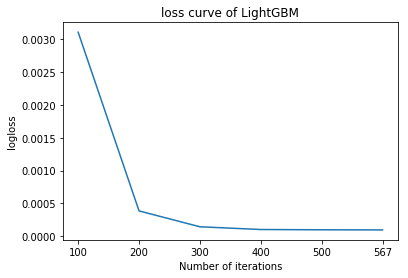

In [16]:
## 损失度与迭代次数的曲线
import matplotlib.pyplot as plt
logloss_dict = {'100':0.00310392, '200':0.000386649, '300':0.000145503, 
                '400':0.000103992, '500':9.96661e-05, '567':9.779e-05}
plt.plot(logloss_dict.keys(), logloss_dict.values())
plt.xlabel('Number of iterations')
plt.ylabel('logloss')
# plt.ylim([0.0002, 0.002])
plt.title('loss curve of LightGBM')
plt.show()

### 实验分组和测评方式
    1、四组（每组包括已知入侵和未知入侵）————因此进行训练时可以分为19个已知入侵，3个未知入侵
    2、同一组内不同类别标签的识别率；不同组间的相同类别标签的识别率；
    3、性能比较：此模型方法和其他模型方法之间的性能比较（检测率和误报率————统计检测率的均值方差和误报率的均值方差）
    4、不同方法之间检测时，要严格控制测试数据集一致。
    3、测评方式：一般是检测率和误报率

## 模型检验与评估
以下为10%数据集的检验和特征重要性分析

## 机器学习多分类评估方法
    宏平均、微平均
    更注重样本量多的class，使用宏平均；更注重样本量少的class，使用微平均

[[39053     0     0     0     1]
 [    0 39444     0     0     1]
 [    0     0 39066     0     0]
 [    0     0     0 39006     0]
 [    0     0     0     0 39158]]
总体识别率为： 0.9999897817901282
normal识别率为 1.0
Dos识别率 1.0
Probing识别率 1.0
R2L识别率 0.9999489274770174
U2R识别率 1.0


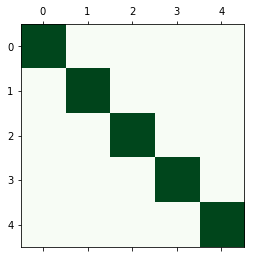

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     39054
           1       1.00      1.00      1.00     39445
           2       1.00      1.00      1.00     39066
           3       1.00      1.00      1.00     39006
           4       1.00      1.00      1.00     39158

   micro avg       1.00      1.00      1.00    195729
   macro avg       1.00      1.00      1.00    195729
weighted avg       1.00      1.00      1.00    195729



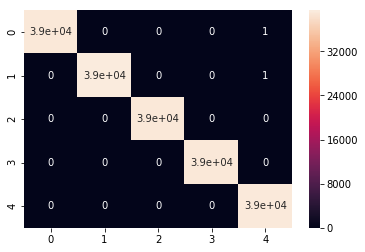

In [38]:
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report

def modelCheck(pred_val, df):
    ##模型检验函数，input:模型预测分类和实际分类，output：混淆矩阵（图），分类报告##
    prediction_val=[]
    for x in pred_val:
        prediction_val.append(np.argmax(x))

    cm = confusion_matrix(df['label'], prediction_val)   #Ci,j表示实际类别为i但是预测为类别j的观测数量
    # tn, fp, fn, tp = np.ravel(cm)   #此处结果只针对二分类问题
    print(cm)
    
    ##检测率：指测试集中攻击样本被正确识别为攻击的比例
    ##精确率：指测试集中所有被IDS识别为攻击样本中，真正为攻击样本的比值；
    ##混淆矩阵中，横向为预测的分类标签，纵向为实际的分类标签
    detection_Rate = (cm[0,0]+cm[1,1]+cm[2,2]+cm[3,3]+cm[4,4])/(cm.sum())
    detectionNormal_Rate = cm[0,0] / cm[:,0].sum()    # normal检测率
    detectionDos_Rate = cm[1,1] / cm[:,1].sum()   # Dos检测率
    detectionProbing_Rate = cm[2,2] / cm[:,2].sum()   # Probing检测率
    detectionU2R_Rate = cm[3,3] / cm[:,3].sum()   # U2R检测率
    detectionR2L_Rate = cm[4,4] / cm[:,4].sum()   # R2L检测率
    
    print("总体识别率为：", detection_Rate)
    print("normal识别率为", detectionNormal_Rate)
    print("Dos识别率", detectionDos_Rate)    
    print("Probing识别率", detectionProbing_Rate)
    print("R2L识别率", detectionR2L_Rate)
    print("U2R识别率", detectionU2R_Rate)

    # detection_Rate = tp / (tp + fn)    #检测率：99.76%
    # falseAlarm_Rate = fp / (fp + tn)   #误报率：0.1996%
    # print("检测率为：", detection_Rate)
    # print("误报率为：", falseAlarm_Rate)
    
    # 可视化矩阵图
    plt.matshow(cm,cmap=plt.cm.Greens)
    plt.show()
    
    ##多分类评估热点图##
    cm_df = pd.DataFrame(cm)
    sns.heatmap(cm_df, annot=True)

    ##查看多分类的评估报告##
    print(classification_report(df['label'], prediction_val))   #精确率和召回率，f1-score，支持数support
    
modelCheck(pred_val, val_df)

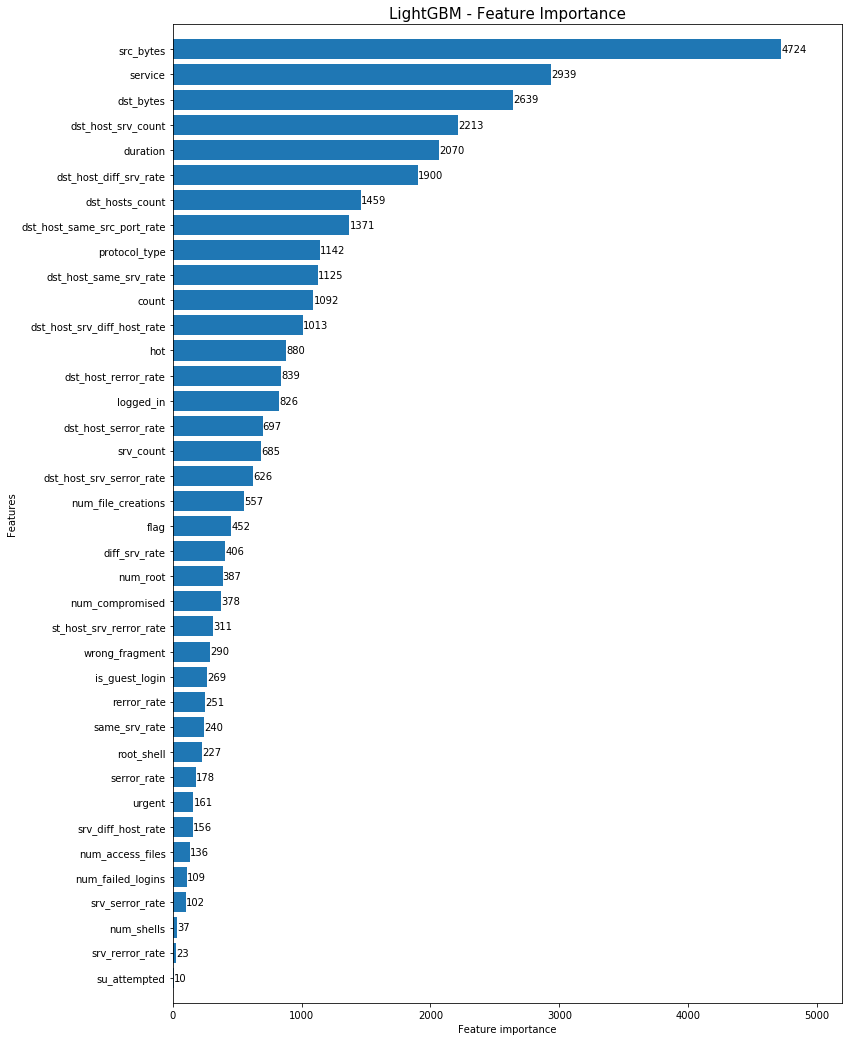

In [39]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12,18))
lgb.plot_importance(model, max_num_features=50, height=0.8, ax=ax)
ax.grid(False)
plt.title("LightGBM - Feature Importance", fontsize=15)
plt.show()

### 以下为完整数据集（4898431行数据，42列特征）的验证和检测率分析

In [14]:
Features=['duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent',
         'hot','num_failed_logins','logged_in','num_compromised','root_shell','su_attempted','num_root',
          'num_file_creations','num_shells','num_access_files','num_outbound_cmds','is_hot_login','is_guest_login',
         'count','srv_count','serror_rate','srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate',
          'diff_srv_rate','srv_diff_host_rate',
         'dst_hosts_count','dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate',
          'dst_host_same_src_port_rate','dst_host_srv_diff_host_rate','dst_host_serror_rate',
          'dst_host_srv_serror_rate','dst_host_rerror_rate','st_host_srv_rerror_rate', 
         'label']

kddTotal_df = pd.read_csv("./datafile/kddcup.data.corrected", names=Features)


In [15]:
kddTotal_df.shape

(4898431, 42)

In [16]:
kddTotal_df = FeaturePreprocessing(kddTotal_df)

protocol_type
service
flag
label


In [18]:
test_X = kddTotal_df[['protocol_type', 'service', 'flag'] + Features_num] 
pred_test_y = model.predict(test_X, num_iteration=model.best_iteration)


[[3883358       1       1       0      10]
 [      4   40934       7       1     156]
 [      0       0    1121       0       5]
 [      0       0       2      42       8]
 [     48      52     105      32  972544]]
总体识别率为： 0.9999118084954142
normal识别率为 0.9999969099004216
Dos识别率 0.9959126076589947
Probing识别率 0.9955595026642984
R2L识别率 0.9997563685968374
U2R识别率 0.8076923076923077


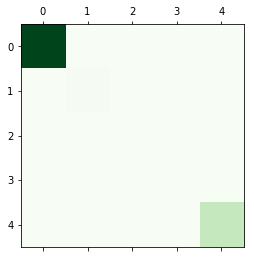

             precision    recall  f1-score   support

          0       1.00      1.00      1.00   3883370
          1       1.00      1.00      1.00     41102
          2       0.91      1.00      0.95      1126
          3       0.56      0.81      0.66        52
          4       1.00      1.00      1.00    972781

avg / total       1.00      1.00      1.00   4898431



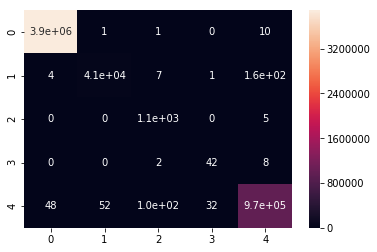

In [19]:
modelCheck(pred_test_y, kddTotal_df)

## 测试集分为四组
    1、来自训练集：28000正常+2000异常；
    2、来自训练集：28000正常+2000异常；
    3、除去训练集之后的部分：28000正常+2000异常;
    4、除去训练集之后的部分：28000正常+2000异常;
    5、训练集中有23种标签，其中有两种['spy.', 'warezclient.']没有出现在测试集中；
    6、测试集中有38种标签，有21种（包括normal）与训练集一样，有17种是未知入侵；

In [40]:
##加载含标签测试数据##
import pandas as pd
Features=['duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent',
         'hot','num_failed_logins','logged_in','num_compromised','root_shell','su_attempted','num_root',
          'num_file_creations','num_shells','num_access_files','num_outbound_cmds','is_hot_login','is_guest_login',
         'count','srv_count','serror_rate','srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate',
          'diff_srv_rate','srv_diff_host_rate',
         'dst_hosts_count','dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate',
          'dst_host_same_src_port_rate','dst_host_srv_diff_host_rate','dst_host_serror_rate',
          'dst_host_srv_serror_rate','dst_host_rerror_rate','st_host_srv_rerror_rate', 
         'label']

testFromTrain_df = pd.read_csv("./input_data/kddcup.data_10_percent_corrected", names=Features)
testLabeled_df = pd.read_csv("./input_data/corrected", names=Features)

##划分测试集##
from sklearn.model_selection import train_test_split
first_test, second_test = train_test_split(testFromTrain_df, test_size=0.5, random_state=1)   #从训练集中随机分配测试集
third_test, forth_test = train_test_split(testLabeled_df, test_size=0.5, random_state=1)   #从测试集中随机分配测试集

# ##区分已知入侵和未知入侵##
# labels=['normal.', 'buffer_overflow.', 'loadmodule.', 'perl.', 'neptune.', 'smurf.', 'guess_passwd.', 'pod.', 
#         'teardrop.', 'portsweep.', 'ipsweep.', 'land.', 'ftp_write.', 'back.', 'imap.', 'satan.', 'phf.',
#         'nmap.', 'multihop.', 'warezmaster.', 'warezclient.', 'spy.', 'rootkit.']
# testKonwIntrusion_df = testLabeled_df.loc[testLabeled_df['label'].isin(labels), :]
# testUnkonwIntrusion_df = testLabeled_df.loc[~testLabeled_df['label'].isin(labels), :]

In [41]:
labels_Normal = ['normal.']
labels_Dos = ['back.', 'land.', 'neptune.', 'pod.', 'smurf.', 'teardrop.'] + ['apache2.', 'mailbomb.', 'processtable.', 'udpstorm.']
labels_Probing = ['ipsweep.', 'nmap.', 'portsweep.', 'satan.'] + ['mscan.', 'saint.']

labels_R2L = ['ftp_write.', 'guess_passwd.', 'imap.', 'multihop.', 'phf.', 'spy.', 'warezclient.', 'warezmaster.'] + [
                'named.', 'sendmail.', 'snmpgeattack.', 'snmpguess.', 'worm.', 'xlock.', 'xsnoop.']
labels_U2R = ['buffer_overflow.', 'loadmodule.', 'perl.', 'rootkit.'] + ['httptunnel.', 'ps.', 'sqlattack.', 'xterm.']

labels_Probing1 = ['ipsweep.', 'nmap.', 'portsweep.', 'satan.']
labels_Probing2 = ['mscan.', 'saint.']
labels_U2R1 = ['buffer_overflow.', 'loadmodule.', 'perl.', 'rootkit.']
labels_U2R2 = ['httptunnel.', 'ps.', 'sqlattack.', 'xterm.']

print(forth_test.loc[forth_test['label'].isin(labels_U2R1), 'label'].count())
print(forth_test.loc[forth_test['label'].isin(labels_U2R2), 'label'].count())

20
85


In [42]:
print(labelCount(first_test))
print(labelCount(second_test))
print(labelCount(third_test))
print(labelCount(forth_test))

该数据集总数为： 247010 ，其中
  normal类型总数为： 48704
  Dos类型总数为： 195642
  Probing类型总数为： 2080
  R2L类型总数为： 553
  U2R类型总数为： 31
['neptune.' 'smurf.' 'normal.' 'ipsweep.' 'warezmaster.' 'teardrop.'
 'satan.' 'back.' 'warezclient.' 'nmap.' 'portsweep.' 'pod.' 'perl.'
 'guess_passwd.' 'land.' 'buffer_overflow.' 'imap.' 'phf.' 'multihop.'
 'rootkit.' 'loadmodule.' 'ftp_write.' 'spy.'] 23
None
该数据集总数为： 247011 ，其中
  normal类型总数为： 48574
  Dos类型总数为： 195816
  Probing类型总数为： 2027
  R2L类型总数为： 573
  U2R类型总数为： 21
['smurf.' 'neptune.' 'normal.' 'ipsweep.' 'satan.' 'nmap.' 'back.'
 'warezclient.' 'teardrop.' 'portsweep.' 'pod.' 'guess_passwd.' 'imap.'
 'loadmodule.' 'ftp_write.' 'land.' 'rootkit.' 'warezmaster.'
 'buffer_overflow.' 'perl.' 'multihop.' 'phf.' 'spy.'] 23
None
该数据集总数为： 155514 ，其中
  normal类型总数为： 30490
  Dos类型总数为： 114743
  Probing类型总数为： 2054
  R2L类型总数为： 8104
  U2R类型总数为： 123
['neptune.' 'normal.' 'smurf.' 'snmpgetattack.' 'satan.' 'mailbomb.'
 'guess_passwd.' 'snmpguess.' 'back.' 'processtable.' 'mscan.' 'n

/home/huge/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


protocol_type
service
flag
label
[[195642      0      0      0      0]
 [     0   2080      0      0      0]
 [     0      0    553      0      0]
 [     0      0      0     31      0]
 [     0      0      0      0  48704]]
总体识别率为： 1.0
normal识别率为 1.0
Dos识别率 1.0
Probing识别率 1.0
R2L识别率 1.0
U2R识别率 1.0


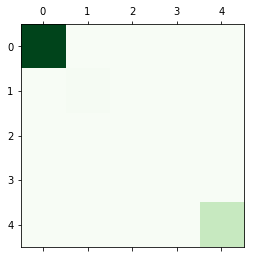

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    195642
           1       1.00      1.00      1.00      2080
           2       1.00      1.00      1.00       553
           3       1.00      1.00      1.00        31
           4       1.00      1.00      1.00     48704

   micro avg       1.00      1.00      1.00    247010
   macro avg       1.00      1.00      1.00    247010
weighted avg       1.00      1.00      1.00    247010



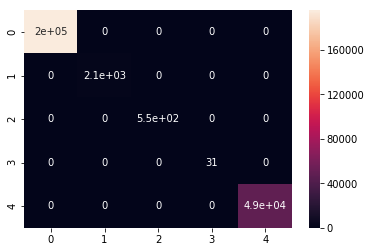

In [43]:
##第一组测试##
first_test = FeaturePreprocessing(first_test)
test_X = first_test[['protocol_type', 'service', 'flag'] + Features_num] 
pred_test1_y = model.predict(test_X, num_iteration=model.best_iteration)
modelCheck(pred_test1_y, first_test)

/home/huge/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


protocol_type
service
flag
label
[[195813      0      0      0      3]
 [     0   2026      0      0      1]
 [     0      0    573      0      0]
 [     0      0      0     21      0]
 [     0      0      0      0  48574]]
总体识别率为： 0.9999838063891892
normal识别率为 1.0
Dos识别率 1.0
Probing识别率 1.0
R2L识别率 0.9999176581991848
U2R识别率 1.0


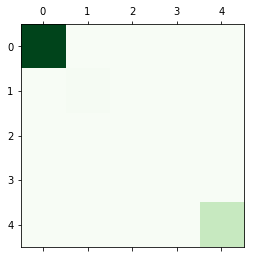

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    195816
           1       1.00      1.00      1.00      2027
           2       1.00      1.00      1.00       573
           3       1.00      1.00      1.00        21
           4       1.00      1.00      1.00     48574

   micro avg       1.00      1.00      1.00    247011
   macro avg       1.00      1.00      1.00    247011
weighted avg       1.00      1.00      1.00    247011



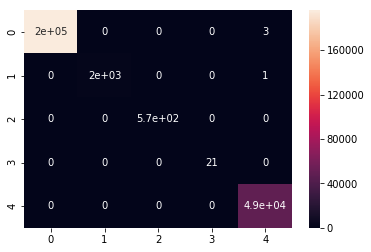

In [44]:
##第二组测试##
second_test = FeaturePreprocessing(second_test)
test_X = second_test[['protocol_type', 'service', 'flag'] + Features_num] 
pred_test2_y = model.predict(test_X, num_iteration=model.best_iteration)
modelCheck(pred_test2_y, second_test)

/home/huge/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


protocol_type
service
flag
label
[[111665     49      0      0   3029]
 [  3322  86901      3      0  24517]
 [     0    356   6651     66 107670]
 [     0  10940   8259  14168  81376]
 [   126    413     13      7 114184]]
总体识别率为： 0.5814193458424479
normal识别率为 0.9700468235559842
Dos识别率 0.8808218206144396
Probing识别率 0.4455982848720354
R2L识别率 0.3452003772946042
U2R识别率 0.9948739554806545


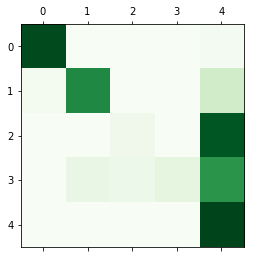

              precision    recall  f1-score   support

           0       0.97      0.97      0.97    114743
           1       0.88      0.76      0.81    114743
           2       0.45      0.06      0.10    114743
           3       0.99      0.12      0.22    114743
           4       0.35      1.00      0.51    114743

   micro avg       0.58      0.58      0.58    573715
   macro avg       0.73      0.58      0.52    573715
weighted avg       0.73      0.58      0.52    573715



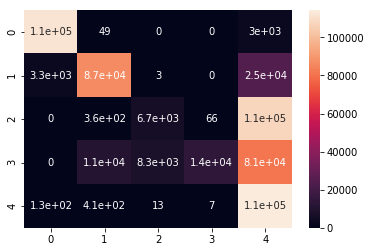

In [45]:
##第三组测试##
third_test = FeaturePreprocessing(third_test)
# third_test = DataBalance(third_test)
test_X = third_test[['protocol_type', 'service', 'flag'] + Features_num] 
pred_test3_y = model.predict(test_X, num_iteration=model.best_iteration)
modelCheck(pred_test3_y, third_test)

/home/huge/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


protocol_type
service
flag
label
[[112134     40      0      1   2935]
 [  3774  87389     13      0  23934]
 [     8    432   6297     42 108331]
 [     0  10344   3868  18376  82522]
 [   137    419      6      7 114541]]
总体识别率为： 0.588544870124229
normal识别率为 0.966230946205613
Dos识别率 0.8860824951330305
Probing识别率 0.6183228593872742
R2L识别率 0.3447299277981599
U2R识别率 0.9972864430695756


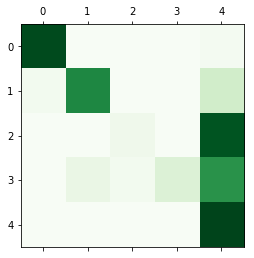

              precision    recall  f1-score   support

           0       0.97      0.97      0.97    115110
           1       0.89      0.76      0.82    115110
           2       0.62      0.05      0.10    115110
           3       1.00      0.16      0.28    115110
           4       0.34      1.00      0.51    115110

   micro avg       0.59      0.59      0.59    575550
   macro avg       0.76      0.59      0.54    575550
weighted avg       0.76      0.59      0.54    575550



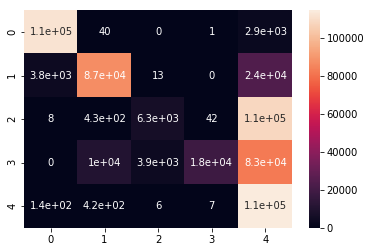

In [46]:
##第四组测试##
forth_test = FeaturePreprocessing(forth_test)
# forth_test = DataBalance(forth_test)
test_X = forth_test[['protocol_type', 'service', 'flag'] + Features_num] 
pred_test4_y = model.predict(test_X, num_iteration=model.best_iteration)
modelCheck(pred_test4_y, forth_test)

### 此处需要区分已知入侵和未知入侵？？？
testLabeled_df

In [47]:
FeaturePreprocession()
##归类类别标签##
labels_Normal = ['normal.']
labels_Dos = ['back.', 'land.', 'neptune.', 'pod.', 'smurf.', 'teardrop.'] + ['apache2.', 'mailbomb.', 'processtable.', 'udpstorm.']
labels_Probing = ['ipsweep.', 'nmap.', 'portsweep.', 'satan.'] + ['mscan.', 'saint.']
labels_R2L = ['ftp_write.', 'guess_passwd.', 'imap.', 'multihop.', 'phf.', 'spy.', 'warezclient.', 'warezmaster.'] + [
                'named.', 'sendmail.', 'snmpgeattack.', 'snmpguess.', 'worm.', 'xlock.', 'xsnoop.']
labels_U2R = ['buffer_overflow.', 'loadmodule.', 'perl.', 'rootkit.'] + ['httptunnel.', 'ps.', 'sqlattack.', 'xterm.']

testLabeled_df.loc[testLabeled_df['label']=='normal.', 'label'] = 'normal'
testLabeled_df.loc[testLabeled_df['label'].isin(labels_Dos), 'label'] = 'Dos'
testLabeled_df.loc[testLabeled_df['label'].isin(labels_Probing), 'label'] = 'Probing'
testLabeled_df.loc[testLabeled_df['label'].isin(labels_R2L), 'label'] = 'R2L'
testLabeled_df.loc[testLabeled_df['label'].isin(labels_U2R), 'label'] = 'U2R'

##特征编码和数值化##
Features_NonNumerical = ['protocol_type', 'service', 'flag', 'label']
for col in Features_NonNumerical:
    print(col)
    lbl = preprocessing.LabelEncoder()
    lbl.fit(list(testLabeled_df[col].values.astype('str')))
    testLabeled_df[col] = lbl.transform(list(testLabeled_df[col].values.astype('str')))

Features_num = ['duration', 'src_bytes','dst_bytes','land','wrong_fragment','urgent',
                 'hot','num_failed_logins','logged_in','num_compromised','root_shell','su_attempted','num_root',
                  'num_file_creations','num_shells','num_access_files','num_outbound_cmds','is_hot_login','is_guest_login',
                 'count','srv_count','serror_rate','srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate',
                  'diff_srv_rate','srv_diff_host_rate',
                 'dst_hosts_count','dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate',
                  'dst_host_same_src_port_rate','dst_host_srv_diff_host_rate','dst_host_serror_rate',
                  'dst_host_srv_serror_rate','dst_host_rerror_rate','st_host_srv_rerror_rate' ]    
for col in Features_num:
    testLabeled_df[col] = testLabeled_df[col].astype(float)

##预测##
predLabeled_test = model.predict(testLabeled_df, num_iteration=model.best_iteration)

protocol_type
service
flag
label


In [49]:
testLabeled_df['service'].nunique()

65

             precision    recall  f1-score   support

          0       1.00      1.00      1.00     74833
          1       1.00      0.96      0.98       310
          2       0.00      0.00      0.00         1
          3       0.90      0.60      0.72        15
          4       0.99      1.00      0.99     18862

avg / total       1.00      1.00      1.00     94021



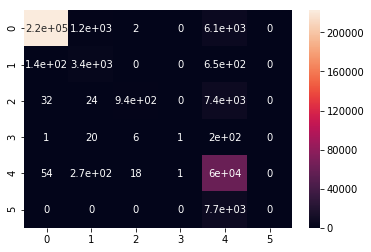

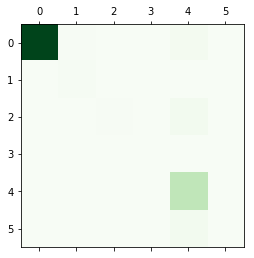

In [42]:
predictionTest_val=[]
for x in predLabeled_test:
    predictionTest_val.append(np.argmax(x))

##多分类评估热点图##
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(testLabeled_df['label'], predictionTest_val)
cm_df = pd.DataFrame(cm)
sns.heatmap(cm_df, annot=True)

##查看多分类的评估报告##
from sklearn.metrics import classification_report
print(classification_report(val_df['label'], prediction_val))   #精确率和召回率，f1-score，支持数support

import matplotlib.pyplot as plt   #导入作图函数
plt.matshow(cm,cmap=plt.cm.Greens)   #矩阵图可视化

In [19]:
# ##加载不含标签的测试集##
# import pandas as pd

# Features_nolabeled=['duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent',
#                      'hot','num_failed_logins','logged_in','num_compromised','root_shell','su_attempted','num_root',
#                       'num_file_creations','num_shells','num_access_files','num_outbound_cmds','is_hot_login','is_guest_login',
#                      'count','srv_count','serror_rate','srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate',
#                       'diff_srv_rate','srv_diff_host_rate',
#                      'dst_hosts_count','dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate',
#                       'dst_host_same_src_port_rate','dst_host_srv_diff_host_rate','dst_host_serror_rate',
#                       'dst_host_srv_serror_rate','dst_host_rerror_rate','st_host_srv_rerror_rate']

# test_df = pd.read_csv("./datafile/kddcup.newtestdata_10_percent_unlabeled", names=Features_nolabeled)


# Features_NonNumerical = ['protocol_type', 'service', 'flag']
# for col in Features_NonNumerical:
#     print(col)
#     lbl = preprocessing.LabelEncoder()
#     lbl.fit(list(test_df[col].values.astype('str')))
#     test_df[col] = lbl.transform(list(test_df[col].values.astype('str')))

# Features_num = ['duration', 'src_bytes','dst_bytes','land','wrong_fragment','urgent',
#                  'hot','num_failed_logins','logged_in','num_compromised','root_shell','su_attempted','num_root',
#                   'num_file_creations','num_shells','num_access_files','num_outbound_cmds','is_hot_login','is_guest_login',
#                  'count','srv_count','serror_rate','srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate',
#                   'diff_srv_rate','srv_diff_host_rate',
#                  'dst_hosts_count','dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate',
#                   'dst_host_same_src_port_rate','dst_host_srv_diff_host_rate','dst_host_serror_rate',
#                   'dst_host_srv_serror_rate','dst_host_rerror_rate','st_host_srv_rerror_rate' ]    
# for col in Features_num:
#     test_df[col] = test_df[col].astype(float)

# pred_test = model.predict(test_df, num_iteration=model.best_iteration)